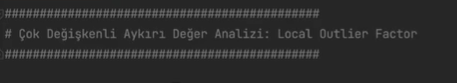

In [12]:
import seaborn as sns

In [37]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64'])
print(df.shape[0])

53940


In [38]:
df = df.dropna()
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [21]:
def outlier_thresholds(dataframe,col_name,q1 = 0.25 , q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 +1.5 * interquantile_range
    low_limit = quartile1 -1.5 *interquantile_range
    return low_limit , up_limit

In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)  # Değişken adı düzeltildi
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):  # Parantezler ve operatör düzeltildi
        return True
    else:
        return False

In [28]:
for col in df:
    print(col,check_outlier(df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [34]:
low , up = outlier_thresholds(df,"carat")
df[((df["carat"] <low) | (df["carat"] > up ))].shape

(1889, 7)

In [40]:
low , up = outlier_thresholds(df,"table")
df[((df["table"] <low) | (df["table"] > up ))].shape

(605, 7)

In [41]:
from sklearn.neighbors import LocalOutlierFactor


In [43]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [52]:
df_scores = clf.negative_outlier_factor_
#df_scores = - df_scores
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.06721815,
       -1.00809552, -1.00849038])

In [55]:
import numpy as np
import pandas as pd
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

<Axes: >

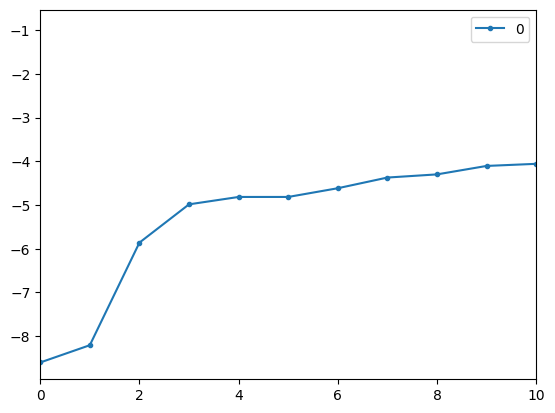

In [58]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked = True , xlim =[0,10] , style='.-')

In [61]:
th = np.sort(df_scores)[3]
th

np.float64(-4.984151747711709)

In [62]:
df[df_scores <th ] 

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [64]:
df.describe([0.01 , 0.05 ,0.75 , 0.90 , 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.0,0.797940,0.474011,0.2,0.24,0.30,0.70,1.04,1.51,2.18,5.01
depth,53940.0,61.749405,1.432621,43.0,57.90,59.30,61.80,62.50,63.30,65.60,79.00
table,53940.0,57.457184,2.234491,43.0,53.00,54.00,57.00,59.00,60.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,429.00,544.00,2401.00,5324.25,9821.00,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,4.02,4.29,5.70,6.54,7.31,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,4.04,4.30,5.71,6.54,7.30,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,2.48,2.65,3.53,4.04,4.52,5.15,31.80


In [65]:
df[df_scores < th].drop(axis=0 , labels= df[df_scores < th].index)

,carat,depth,table,price,x,y,z


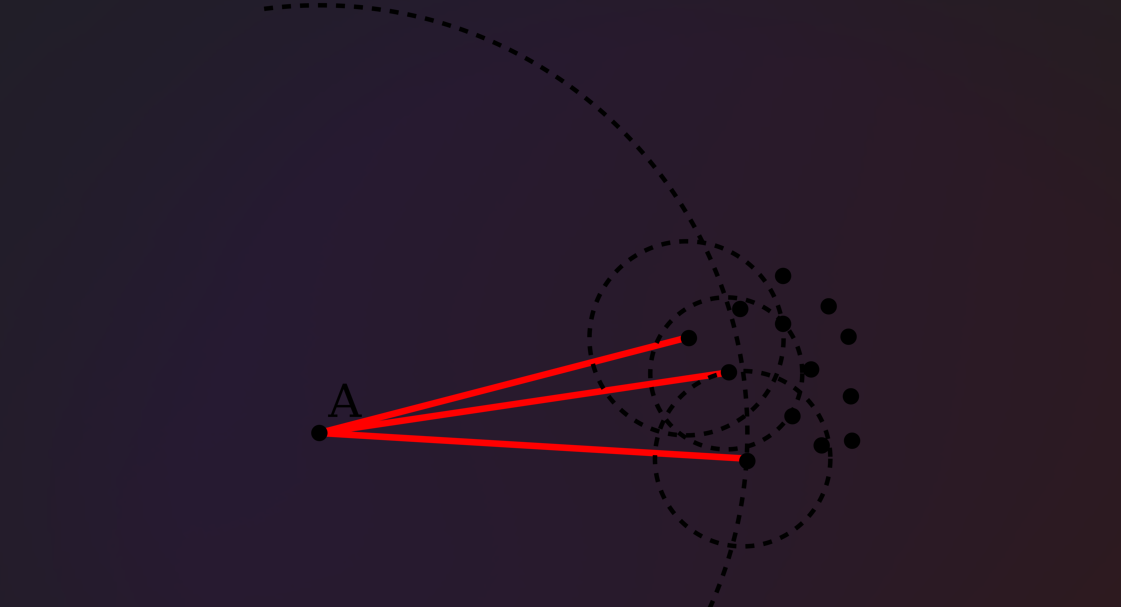

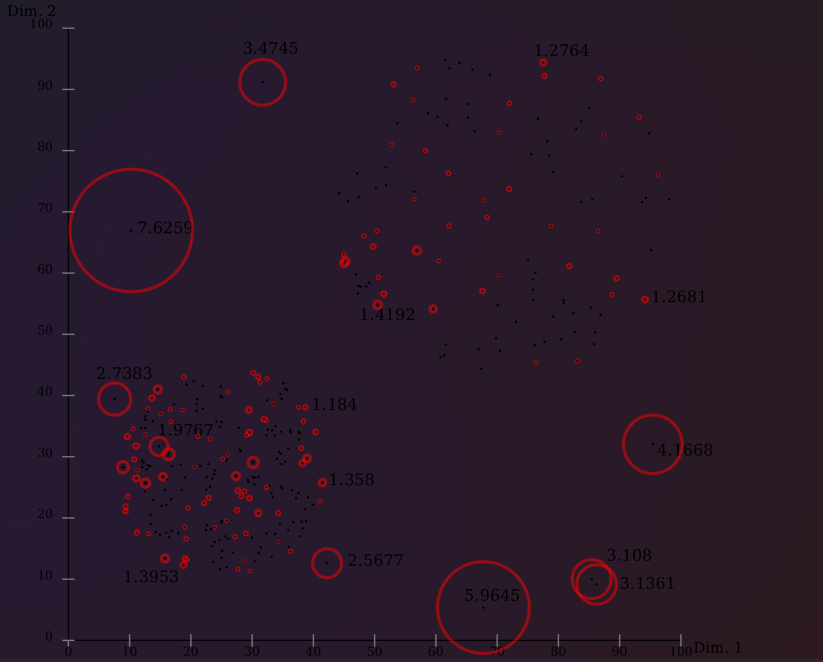